# Structure map v1 (l=3,n=6, average descriptor over the whole cell, values not scaled)

In [1]:
%pip install numpy scikit-learn matplotlib seaborn pandas
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



Note: you may need to restart the kernel to use updated packages.


In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
print("Pandas version:", pd.__version__)

Pandas version: 2.2.3


In [9]:

import pandas as pd
# structure = pd.read_csv("/u/vld/sjoh5417/part-2/week-1/aSi-data/xyz/64-atoms.xyz")
# structure=structure.dropna()
# df_64=pd.read_pickle('/u/vld/sjoh5417/part-2/week-1/aSi-data/xyz/df_npt_anneal_293K_10ps_-1_64-atoms.pckl.gzip',compression="gzip")
df_216=pd.read_pickle('/u/vld/sjoh5417/part-2/week-1/aSi-data/xyz/df_npt_anneal_293K_10ps_-1_216-atoms.pckl.gzip',compression="gzip")
df_512=pd.read_pickle('/u/vld/sjoh5417/part-2/week-1/aSi-data/xyz/df_npt_anneal_293K_10ps_-1_512-atoms.pckl.gzip',compression="gzip")
df_1000=pd.read_pickle('/u/vld/sjoh5417/part-2/week-1/aSi-data/xyz/df_npt_anneal_293K_10ps_-1_1000-atoms.pckl.gzip',compression="gzip")
df_combined=pd.concat([df_64,df_216,df_512, df_1000], axis=0)

# test_pickle=pd.read_pickle('/u/vld/sjoh5417/part-2/week-1/df_npt_anneal_293K_ptm-labels_-1.pckl.gzip',compression="gzip")


ImportError: cannot import name 'simpleace' from partially initialized module 'pyace' (most likely due to a circular import) (/u/vld/sjoh5417/miniconda3/envs/project-2/lib/python3.10/site-packages/pyace/__init__.py)

In [14]:
structures=df_combined.iloc[:,0]


In [15]:
import quippy
from quippy.descriptors import Descriptor

soap_descriptor_str = ('soap l_max=3 n_max=6 ' # basis function size
                       'atom_sigma=0.5 cutoff=5.0 ' # smoothness and cutoff(Angstrom)
                       'average=T') # average descriptor over whole cell, or one descriptor for each atom

soap_atomistic = Descriptor(soap_descriptor_str, random=42)

def soap_descriptors_array(structures) :
   
    # Calculate descriptors for each structure
    descriptors = [soap_atomistic.calc_descriptor(structure) for structure in structures]
    
    # Combine the descriptors into a single array
    combined_descriptors = np.concatenate(descriptors)
    
    return combined_descriptors

# single_structure_1=soap_atomistic.calc_descriptor(structures[0])
# single_structure_2=soap_atomistic.calc_descriptor(structures[1])
# print(type(structures))
# single_structure_1=pd.concat([single_structure_1, single_structure_2])


In [16]:
combined_soap_descriptors=soap_descriptors_array(structures)
# scaled_soap_descriptors= StandardScaler().fit_transform(combined_soap_descriptors)
# df_combined.to_csv('/u/vld/sjoh5417/part-2/week-1/df_combined.csv', index=False)

In [33]:
import umap
reducer = umap.UMAP(random_state=42)
reducer.fit(combined_soap_descriptors)

/u/vld/sjoh5417/miniconda3/envs/project-2/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [34]:
embedding = reducer.transform(combined_soap_descriptors)
embedding.shape
df_combined.Category_2
print(len(df_combined.Category_2))

3069


In [35]:
print(type(df_combined.Category_2))
df_combined.columns

<class 'pandas.core.series.Series'>


Index(['ase_atoms', 'nb_atoms', 'label', 'Category_2', 'Category_color_2',
       'gap_energy', 'dE_gap', 'gap_at_E_NN', 'mtp_energy', 'dE_mtp',
       'mtp_at_E_NN', 'soap_sim_cSi', 'atomistic_soap_sim_cSi'],
      dtype='object')

### Figure.1: UMAP projection of a-Si dataset - different categories coloured

/tmp/ipykernel_3825586/3747725494.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1],


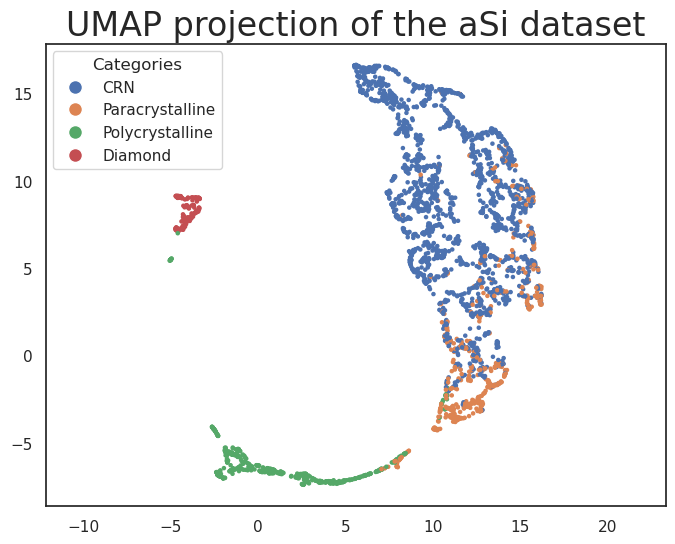

In [36]:


plt.scatter(embedding[:, 0], embedding[:, 1],
            c=[sns.color_palette()[x] for x in df_combined.Category_2.map({"CRN": 0, "Paracrystalline": 1, "Polycrystalline": 2, "Diamond": 3})],
            cmap='Spectral', s=5)
plt.gcf().set_size_inches(8, 6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the aSi dataset', fontsize=24);
categories = ["CRN", "Paracrystalline", "Polycrystalline", "Diamond"]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[i], markersize=10) for i in range(len(categories))]
plt.legend(handles, categories, title="Categories")


## Colour gradient

### Calculate average dE gaps per category

In [37]:
diamond_mtpE_gap = df_combined[df_combined['Category_2'] == 'Diamond']['dE_mtp']
diamond_average = diamond_mtpE_gap.mean()

polycrystalline_mtpE_gap = df_combined[df_combined['Category_2'] == 'Polycrystalline']['dE_mtp']
polycrystalline_average = polycrystalline_mtpE_gap.mean()

paracrystalline_mtpE_gap = df_combined[df_combined['Category_2'] == 'Paracrystalline']['dE_mtp']
paracrystalline_average= paracrystalline_mtpE_gap.mean()


CRN_mtpE_gap = df_combined[df_combined['Category_2'] == 'CRN']['dE_mtp']
CRN_average = CRN_mtpE_gap.mean()
print(diamond_average, polycrystalline_average, paracrystalline_average, CRN_average)

0.03781763024574179 0.09947004973825586 0.16414336698297755 0.19043176534984924


Old color gradient

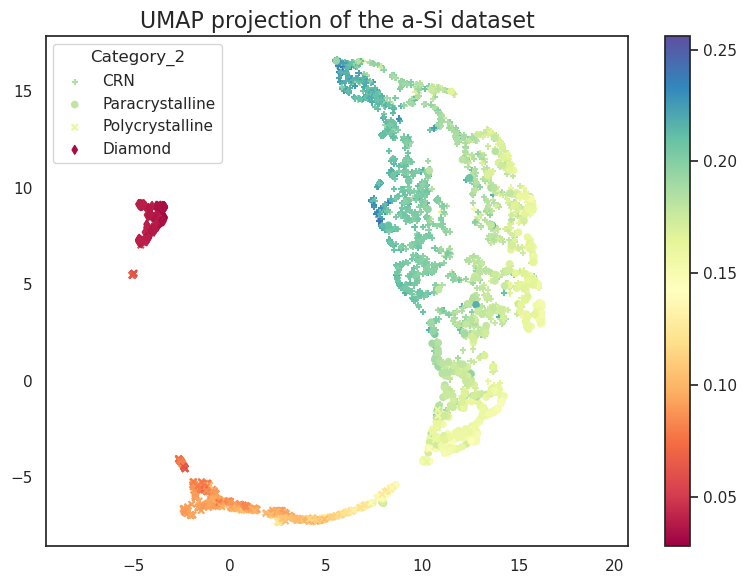

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df_combined, embedding, polycrystalline_average, and paracrystalline_average are already defined

cmap = plt.get_cmap('viridis')
colors = df_combined.dE_mtp
marker_styles = {"CRN": '+',
 "Paracrystalline": 'o', 
 "Polycrystalline": 'x', 
 "Diamond": 'd'}

# Define the specific numerical values for the color limits
vmin = 0.0280  # Replace with your desired minimum value
vmax = 0.256  # Replace with your desired maximum value

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each category separately
for category, marker in marker_styles.items():
    mask = df_combined.Category_2 == category
    plt.scatter(embedding[mask, 0], embedding[mask, 1],
                c=colors[mask],
                marker=marker,
                cmap='Spectral', s=20, label=category, vmin=vmin, vmax=vmax)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the a-Si dataset', fontsize=16)

# Add colorbar with full range of values
cbar = plt.colorbar()


# Add legend for markers
plt.legend(title='Category_2')

plt.tight_layout()
plt.show()

# Save the plot
# plt.savefig('/path/to/your/folder/plot.png', dpi=300, bbox_inches='tight')

## Colour gradient with specific marker styles

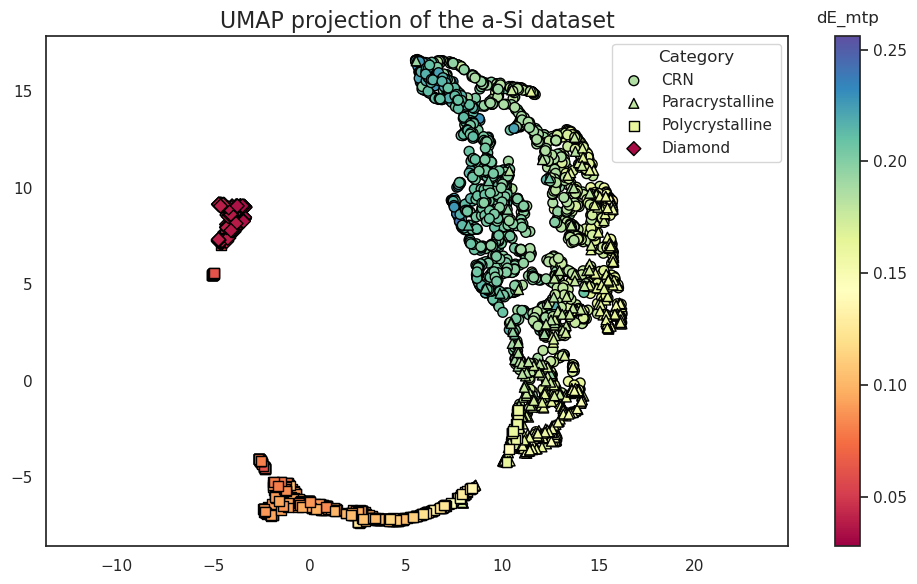

In [40]:
#define marker properties and colors
colors = df_combined.dE_mtp
marker_properties = {
    "CRN": ("o", "yellow", "black", 50, 1),            # Circle marker, yellow fill, black edge, size 150, linewidth 2
    "Paracrystalline": ("^", "cyan", "black", 50, 1),    # Square marker, cyan fill, blue edge, size 120, linewidth 3
    "Polycrystalline": ("s", "red", "black", 50, 1),    # Triangle marker, red fill, green edge, size 180, linewidth 2
    "Diamond": ("D", "orange", "black", 50, 1)         # Diamond marker, orange fill, purple edge, size 160, linewidth 4
}

# Define the specific numerical values for the color limits
vmin = 0.0280  
vmax = 0.256  

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each category separately
for category, (marker, facecolor, edgecolor, size, linewidth) in marker_properties.items():
    mask = df_combined.Category_2 == category
    plt.scatter(embedding[mask, 0], embedding[mask, 1],
                c=colors[mask],
                marker=marker,
                cmap='Spectral', vmin=vmin, vmax=vmax,
                s=size, 
                edgecolor=edgecolor, 
                linewidth=linewidth, 
                label=category)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the a-Si dataset', fontsize=16)

# Add colorbar with full range of values
cbar = plt.colorbar()
cbar.ax.set_xlabel('dE_mtp', labelpad=10)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.yaxis.set_label_position('left')
cbar.ax.yaxis.set_label_coords(-0.1, 1.05)


# Add legend for markers
plt.legend(title='Category')

plt.tight_layout()
# Save the plot
plt.savefig('/u/vld/sjoh5417/part-2/week-1/weekly_report/color_gradient_l3_n6_v2.png', dpi=300, bbox_inches='tight')
plt.show()





# Structure map v1 (l=3,n=6, average descriptor over the whole cell, values scaled)

In [2]:
%pip install numpy scikit-learn matplotlib seaborn pandas
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



Note: you may need to restart the kernel to use updated packages.


In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [4]:

import pandas as pd
# structure = pd.read_csv("/u/vld/sjoh5417/part-2/week-1/aSi-data/xyz/64-atoms.xyz")
# structure=structure.dropna()
df_64=pd.read_pickle('/u/vld/sjoh5417/part-2/week-1/aSi-data/xyz/df_npt_anneal_293K_10ps_-1_64-atoms.pckl.gzip',compression="gzip")
df_216=pd.read_pickle('/u/vld/sjoh5417/part-2/week-1/aSi-data/xyz/df_npt_anneal_293K_10ps_-1_216-atoms.pckl.gzip',compression="gzip")
df_512=pd.read_pickle('/u/vld/sjoh5417/part-2/week-1/aSi-data/xyz/df_npt_anneal_293K_10ps_-1_512-atoms.pckl.gzip',compression="gzip")
df_1000=pd.read_pickle('/u/vld/sjoh5417/part-2/week-1/aSi-data/xyz/df_npt_anneal_293K_10ps_-1_1000-atoms.pckl.gzip',compression="gzip")
df_combined=pd.concat([df_64,df_216,df_512, df_1000], axis=0)




In [5]:
structures=df_combined.iloc[:,0]


In [6]:
import quippy
from quippy.descriptors import Descriptor

soap_descriptor_str = ('soap l_max=3 n_max=6 ' # basis function size
                       'atom_sigma=0.5 cutoff=5.0 ' # smoothness and cutoff(Angstrom)
                       'average=T') # average descriptor over whole cell, or one descriptor for each atom

soap_atomistic = Descriptor(soap_descriptor_str, random=42)

def soap_descriptors_array(structures) :
   
    # Calculate descriptors for each structure
    descriptors = [soap_atomistic.calc_descriptor(structure) for structure in structures]
    
    # Combine the descriptors into a single array
    combined_descriptors = np.concatenate(descriptors)
    
    return combined_descriptors




In [7]:
combined_soap_descriptors=soap_descriptors_array(structures)
scaled_soap_descriptors= StandardScaler().fit_transform(combined_soap_descriptors)


In [10]:
import umap
reducer = umap.UMAP(random_state=42)
reducer.fit(scaled_soap_descriptors)

/u/vld/sjoh5417/miniconda3/envs/project-2/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [11]:
embedding = reducer.transform(scaled_soap_descriptors)
embedding.shape
df_combined.Category_2
print(len(df_combined.Category_2))

3069


### Figure.1: UMAP projection of a-Si dataset - different categories coloured

/tmp/ipykernel_3472433/3747725494.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1],


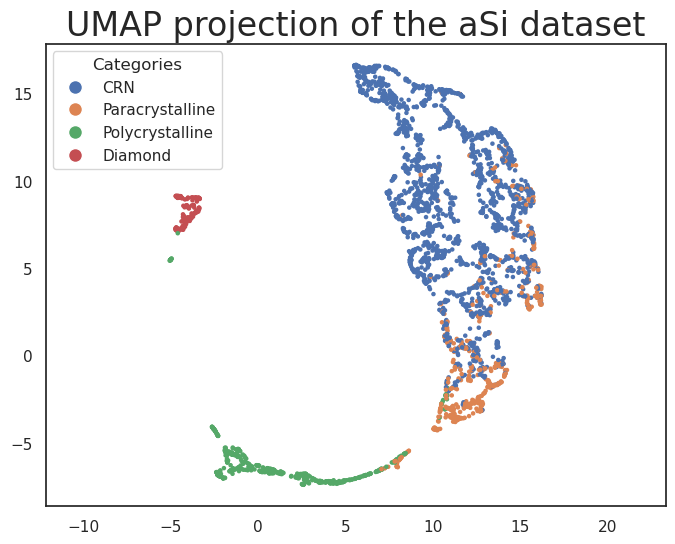

In [ ]:


plt.scatter(embedding[:, 0], embedding[:, 1],
            c=[sns.color_palette()[x] for x in df_combined.Category_2.map({"CRN": 0, "Paracrystalline": 1, "Polycrystalline": 2, "Diamond": 3})],
            cmap='Spectral', s=5)
plt.gcf().set_size_inches(8, 6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the aSi dataset', fontsize=24);
categories = ["CRN", "Paracrystalline", "Polycrystalline", "Diamond"]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[i], markersize=10) for i in range(len(categories))]
plt.legend(handles, categories, title="Categories")


## Colour gradient

### Calculate average dE gaps per category

In [12]:
diamond_mtpE_gap = df_combined[df_combined['Category_2'] == 'Diamond']['dE_mtp']
diamond_average = diamond_mtpE_gap.mean()

polycrystalline_mtpE_gap = df_combined[df_combined['Category_2'] == 'Polycrystalline']['dE_mtp']
polycrystalline_average = polycrystalline_mtpE_gap.mean()

paracrystalline_mtpE_gap = df_combined[df_combined['Category_2'] == 'Paracrystalline']['dE_mtp']
paracrystalline_average= paracrystalline_mtpE_gap.mean()


CRN_mtpE_gap = df_combined[df_combined['Category_2'] == 'CRN']['dE_mtp']
CRN_average = CRN_mtpE_gap.mean()
print(diamond_average, polycrystalline_average, paracrystalline_average, CRN_average)

0.03781763024574179 0.09947004973825586 0.16414336698297755 0.19043176534984924


Old color gradient

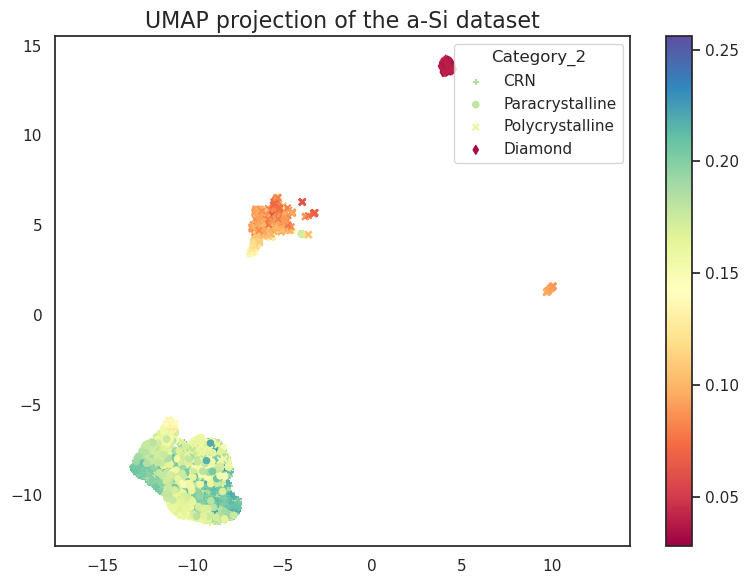

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df_combined, embedding, polycrystalline_average, and paracrystalline_average are already defined

cmap = plt.get_cmap('viridis')
colors = df_combined.dE_mtp
marker_styles = {"CRN": '+',
 "Paracrystalline": 'o', 
 "Polycrystalline": 'x', 
 "Diamond": 'd'}

# Define the specific numerical values for the color limits
vmin = 0.0280  # Replace with your desired minimum value
vmax = 0.256  # Replace with your desired maximum value

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each category separately
for category, marker in marker_styles.items():
    mask = df_combined.Category_2 == category
    plt.scatter(embedding[mask, 0], embedding[mask, 1],
                c=colors[mask],
                marker=marker,
                cmap='Spectral', s=20, label=category, vmin=vmin, vmax=vmax)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the a-Si dataset (scaled data)', fontsize=16)

# Add colorbar with full range of values
cbar = plt.colorbar()


# Add legend for markers
plt.legend(title='Category_2')

plt.tight_layout()
plt.show()

# Save the plot
# plt.savefig('/path/to/your/folder/plot.png', dpi=300, bbox_inches='tight')

## Colour gradient with specific marker styles

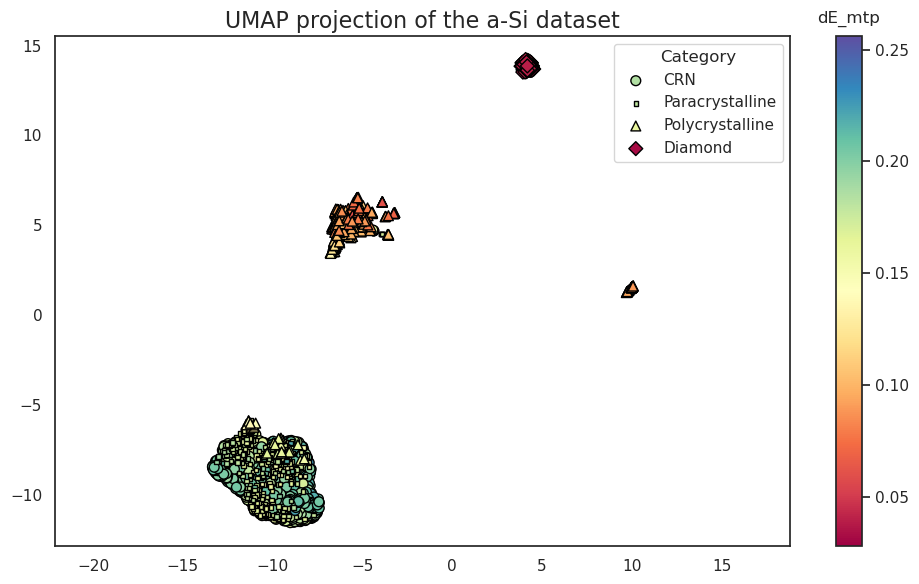

In [17]:
#define marker properties and colors
colors = df_combined.dE_mtp
marker_properties = {
    "CRN": ("o", "yellow", "black", 50, 1),            # Circle marker, yellow fill, black edge, size 150, linewidth 2
    "Paracrystalline": ("s", "cyan", "black", 10, 1),    # Square marker, cyan fill, blue edge, size 120, linewidth 3
    "Polycrystalline": ("^", "red", "black", 50, 1),    # Triangle marker, red fill, green edge, size 180, linewidth 2
    "Diamond": ("D", "orange", "black", 50, 1)         # Diamond marker, orange fill, purple edge, size 160, linewidth 4
}

# Define the specific numerical values for the color limits
vmin = 0.0280  
vmax = 0.256  

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each category separately
for category, (marker, facecolor, edgecolor, size, linewidth) in marker_properties.items():
    mask = df_combined.Category_2 == category
    plt.scatter(embedding[mask, 0], embedding[mask, 1],
                c=colors[mask],
                marker=marker,
                cmap='Spectral', vmin=vmin, vmax=vmax,
                s=size, 
                edgecolor=edgecolor, 
                linewidth=linewidth, 
                label=category)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the a-Si dataset', fontsize=16)

# Add colorbar with full range of values
cbar = plt.colorbar()
cbar.ax.set_xlabel('dE_mtp', labelpad=10)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.yaxis.set_label_position('left')
cbar.ax.yaxis.set_label_coords(-0.1, 1.05)


# Add legend for markers
plt.legend(title='Category')

plt.tight_layout()
# Save the plot
plt.savefig('/u/vld/sjoh5417/part-2/week-1/weekly_report/color_gradient_l3_n6_scaled.png', dpi=300, bbox_inches='tight')
plt.show()



